# Implementação do Algoritmo Backpropagation

A ideia do algoritmo backpropagation é, com base no cálculo do erro ocorrido na camada de saída da rede neural, recalcular o valor dos pesos do vetor w da camada última camada de neurônios e assim proceder para as camadas anteriores, de trás para a frente (fase *backward*), ou seja, atualizar todos os pesos w das camadas a partir da última até atingir a camada de entrada da rede, para isso realizando a retropropagação o erro obtido pela rede. 


O DataSet utilizado para o treinamento da MPL 3x6x2 é o **"arruela.csv"**, o qual possui informações dispostas em colunas:

* **Numamostra**:  Entrada 1 da MPL.
* **Area**:  Entrada 2 da MPL.
* **Delta**:  Entrada 3 da MPL.
* **Output1**:  Saída 1 da MPL.
* **Output2**:  Saída 2 da MPL.


### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Carregando os dados

Para que uma rede dessas funcione, é preciso treiná-la. O treinamento de uma rede MLP insere-se no contexto de aprendizado de máquina supervisionado, em que cada amostra de dados utilizada apresenta um rótulo informando a que classificação ela se encaixa. Assim, utilizaremos um arquivo Data.csv como dataset para treinamento da nossa MPL.

Vamos começar lendo o arquivo Data.csv em um dataframe do pandas.

In [2]:
DataSet=pd.read_csv('arruela.csv')
DataSet.head()

,Hora,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,17:56:39,53,25,69,81,68,1,0
1,17:56:41,53,26,89,87,56,1,0
2,17:56:52,53,27,68,69,55,1,0
3,17:56:55,53,28,36,50,80,1,0
4,17:56:58,53,29,71,72,50,1,0


In [3]:
DataSet.drop(['Hora','Tamanho','Referencia'],axis=1,inplace=True)
DataSet.head()

,NumAmostra,Area,Delta,Output1,Output2
0,69,81,68,1,0
1,89,87,56,1,0
2,68,69,55,1,0
3,36,50,80,1,0
4,71,72,50,1,0


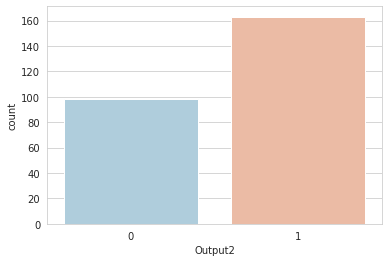

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
plt.show()

### Váriaveis do *Dataset*

In [5]:
DataSet.columns

Index(['NumAmostra', 'Area', 'Delta', 'Output1', 'Output2'], dtype='object')

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Foi separa de forma randômica 40% dos dados para validação.


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#selecionando randomicamente 30% do conjunto total de dados para os testes e o resto para fazer o treinamento supervisionado
X_train, X_test, y_train, y_test = train_test_split(DataSet.drop(['Output1', 'Output2'],axis=1), DataSet[['Output1', 'Output2']], test_size=0.4, random_state=101)
#print(X_test)#entradas
#print(y_test)#saídas

## Configuração da MPL

In [8]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape
print(n_records)#num entradas (dados)
print(n_features)#num de colunas (conjunto/dados)

#Arquitetura da MPL
N_input = 3 #num neuronios de entrada
N_hidden = 6 #num neuronios na camada oculta
N_output = 2 #num de saidas sinalizando uma ou duas peças
learnrate = 0.02 #taxa de aprendizado

156
3


## Inicialização dos pesos da MPL (Aleatório)

In [9]:
#Pesos da Camada Oculta (Inicialização Aleatória)
#weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
#Pesos da Camada de Saída (Inicialização Aleatória)
#weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))

#Pesos da Camada Oculta (valores iniciados)
weights_input_hidden = np.array(
[[-0.19834255, -0.49732947, -0.02092873,  0.86475914,  0.20493013,  0.09492796],
 [ 1.11205097,  0.78359426,  0.14831484,  0.30543981,  0.18576815,  0.04934387],
 [-1.15258628, -0.43606253,  0.18709129, -1.6466203,   0.03700701,  0.18245657]]
)
#Pesos da Camada de Saída ((valores iniciados))
weights_hidden_output = np.array(
 [[ 1.74992136, -1.70794244],
 [-1.59371195,  1.58215166],
 [-0.68152579,  0.59507876],
 [ 1.5941808,  -1.63840192],
 [-0.79796969,  0.72297949],
 [-0.72445758,  0.88948416]]
)

'''print('Pesos da Camada Oculta:')
print(weights_input_hidden)
print('Pesos da Camada de Saída:')
print(weights_hidden_output)'''

"print('Pesos da Camada Oculta:')\nprint(weights_input_hidden)\nprint('Pesos da Camada de Saída:')\nprint(weights_hidden_output)"

## Algoritmo Backpropagation



In [10]:
epochs = 20000
last_loss=None
EvolucaoError=[]
IndiceError=[]

for e in range(epochs):
    delta_w_i_h = np.zeros(weights_input_hidden.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
#-------------------------------------------    
    
# Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error = np.dot(weights_hidden_output,output_error_term)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term*hidden_layer_output[:, None]

        # TODO: Calcule a variação do peso da camada oculta
        delta_w_i_h += hidden_error_term * xi[:, None]
        
    #Atualização dos pesos na época em questão
    weights_input_hidden += learnrate * delta_w_i_h / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    if  e % (epochs / 20) == 0:
        hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - yi) ** 2)

        if last_loss and last_loss < loss:
            print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
        else:
            print("Erro quadrático no treinamento: ", loss)
        last_loss = loss
         
        EvolucaoError.append(loss)
        IndiceError.append(e)

Erro quadrático no treinamento:  0.05959392868347878
Erro quadrático no treinamento:  0.041810723618285986
Erro quadrático no treinamento:  0.03798794715966676
Erro quadrático no treinamento:  0.036191519966434174
Erro quadrático no treinamento:  0.034679905103029346
Erro quadrático no treinamento:  0.03324631144525405
Erro quadrático no treinamento:  0.03189601379724474
Erro quadrático no treinamento:  0.030637775812704094
Erro quadrático no treinamento:  0.02947059007101578
Erro quadrático no treinamento:  0.02838882519470151
Erro quadrático no treinamento:  0.027385458775319792
Erro quadrático no treinamento:  0.02645342542145321
Erro quadrático no treinamento:  0.025586113860003083
Erro quadrático no treinamento:  0.024777520805981317
Erro quadrático no treinamento:  0.024022267853988796
Erro quadrático no treinamento:  0.023315564264354466
Erro quadrático no treinamento:  0.02265315028866914
Erro quadrático no treinamento:  0.022031236159465804
Erro quadrático no treinamento:  0.0

In [11]:
#Pesos da Camada Oculta
print(weights_input_hidden)

#Pesos da Camada de Saída
print()
print(weights_hidden_output)

[[-0.255641   -0.91804708 -0.01634484  0.67868928  0.2102051   0.09806436]
 [ 1.39255295  1.4888272   0.15133004  0.7026484   0.18913961  0.05138895]
 [-1.39995074 -0.90837569  0.19453813 -1.92640068  0.04603755  0.18754653]]

[[ 1.68573518 -1.66026583]
 [-2.88101143  2.876871  ]
 [-0.57900745  0.48921067]
 [ 2.00480099 -2.02339556]
 [-0.69545115  0.61711148]
 [-0.62206322  0.78374142]]


### Gráfico da Evolução do Erro

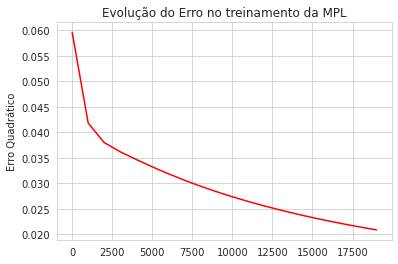

In [12]:
plt.plot(IndiceError, EvolucaoError, 'r')
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()


## Validação do modelo

In [13]:
# Calcule a precisão dos dados de teste
n_records, n_features = X_test.shape
MSE_Output1=0
MSE_Output2=0
predicao=0

for xi, yi in zip(X_test.values, y_test.values):

# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        
#-------------------------------------------    
    
#Cálculo do Erro
        ## TODO: Cálculo do Erro
        error = yi - output
        MSE_Output1 += (yi[0] - output[0])**2
        MSE_Output2 += (yi[1] - output[1])**2
        
#calcul0 do erro de predição
        if(output[0]>output[1]):
            if(yi[0]>yi[1]):
                predicao+=1
        if(output[1]>output[0]):
            if(yi[1]>yi[0]):
                predicao+=1
          
#Erro Quadrático Médio 
MSE_Output1/=n_records 
MSE_Output2/=n_records  

print('Erro Quadrático Médio da Saída Output1 é: ',MSE_Output1)
print('Erro Quadrático Médio da Saída Output2 é: ',MSE_Output2)
print("A acuracia da predicao é:{:.3f}".format(predicao/n_records))

Erro Quadrático Médio da Saída Output1 é:  0.12476377359341541
Erro Quadrático Médio da Saída Output2 é:  0.12478761660110334
A acuracia da predicao é:0.848
